# Deep Learning para la predicción de series temporales

- Hasta ahora, en este curso hemos descrito `métodos estadísticos` tradicionales para el análisis de series temporales. En los capítulos anteriores, hemos analizado varios métodos para predecir la serie en un momento futuro a partir de observaciones tomadas en el pasado. Uno de estos métodos para realizar predicciones es el `modelo autorregresivo` ($AR$), que expresa la serie en el tiempo $t$ como una `regresión lineal` de $p$ observaciones anteriores

$$
y_{t}=\omega_{0}+\sum_{i=1}^{p}\omega_{i}y_{t-i}+\varepsilon_{t}.
$$

- Aquí, $\varepsilon_{t}$ es el término de `error residual` del modelo $AR$. La idea que subyace al modelo lineal puede generalizarse en el sentido de que el objetivo de la predicción de series temporales es `desarrollar una función` $f$ `que prediga` $y_{t}$ `en función de las observaciones en` $p$ `valores previos en el tiempo`

$$
y_{t}=f(y_{t-1}, y_{t-2}, \dots, y_{t-p}).
$$

- En este capítulo, exploraremos tres `métodos basados en redes neuronales para desarrollar la función` $f$. Cada método incluye la definición de una `arquitectura de red neuronal` (en términos del `número de capas ocultas, número de neuronas en cada capa oculta`, etc.) y luego el algoritmo `backpropagation` o su variante adecuada para la arquitectura de red utilizada.

- En los últimos años ha resurgido el interés por las redes neuronales. Esto ha sido posible gracias a la disponibilidad de abundantes datos de entrenamiento procedentes de medios digitales y a un acceso más económico a la `computación paralela basada en GPU`. Estos factores han permitido entrenar redes neuronales con cientos de miles y, en algunos casos, millones de parámetros. Redes neuronales de distintas arquitecturas se han aplicado con éxito para resolver `problemas de visión por computadora, reconocimiento de voz y traducción de lenguaje natural`. Investigaciones y practicas de diseño y entrenamiento de redes neuronales en estas áreas se conoce popularmente como `aprendizaje profundo` que, como el nombre, es indicativo de las `numerosas capas ocultas utilizadas en estos modelos`.

- El aprendizaje profundo ha dado lugar a interesantes arquitecturas neuronales diseñadas para abordar las `características estructurales especiales de datos sobre imagenes y lenguaje`. Por ejemplo las `redes neuronales convolucionales (CNN) están diseñadas para aprovechar las estructuras bidimensionales o tridimensionales de las imágenes`, mientras que la mayoría de `los modelos lingüísticos utilizan redes neuronales recurrentes (RNN) que admiten secuencias y memoria inherente a las idiomas hablados y escritos`. Estos nuevos avances también se han aplicado a ámbitos en los que tradicionalmente dominaba el aprendizaje automático estadístico. Uno de ellos es la `predicción de series temporales`.

- En este capítulo `exploraremos tres tipos diferentes de redes neuronales para la predicción de series temporales`. Empezaremos con los `perceptrones multicapa (MLP)`. A continuación `redes neuronales recurrentes` que se adaptan a la disposición secuencial de los puntos de datos. Por último, las `redes neuronales convolucionales`, que se utilizan sobre todo con imágenes, pero discutiremos como formas especiales de `CNN` pueden ser usadas para la predicción de series temporales. Estos temas se tratarán explicando la arquitectura de la red y cómo puede aplicarse a la previsión de series temporales. Las demostraciones de código muestran cómo utilizar las bibliotecas de aprendizaje automático para desarrollar modelos de predicción de series temporales. 

- Los ejemplos de este capítulo serán implementados utilizando la `API Keras` para el aprendizaje profundo. `Keras` es una `API` de alto nivel que permite `definir diferentes arquitecturas de redes neuronales y entrenarlas utilizando varios optimizadores basados en gradientes`. En el `backend, Keras` utiliza un marco computacional de bajo nivel implementado en `C, C++` y `FORTRAN`. Varios de estos entornos de bajo nivel están disponibles en código abierto. `Keras` soporta los tres siguientes entornos: `TensorFlow, que fue desarrollado por Google` y es el `backend` por defecto de `Keras, CNTK, un marco de código abierto de Microsoft`, y `Theano, desarrollado originalmente en la Universidad de Montreal, Canadá`. Los ejemplos de este libro utilizan `TensorFlow` como backend. Por lo tanto, para ejecutar los ejemplos, necesitarás tanto `Keras` como `TensorFlow` instalados.

## Perceptrones multicapa

- Los `perceptrones multicapa (MLP)` son las formas más básicas de las redes neuronales. Un `MLP` consta de tres componentes: una `capa de entrada`, varias `capas ocultas` y una `capa de salida`. Una `capa de entrada representa un vector de regresores o características de entrada`, por ejemplo, observaciones a partir de $p$ puntos previos en el tiempo $[y_{t-1}, y_{t-2}, \dots, y_{t-p}]$. Las `características de entrada se introducen en una capa oculta` que tiene $n$ neuronas, cada una de las cuales aplica una `transformación lineal` y una `activación no lineal` a las características de entrada. 

- La salida de una neurona es $g_{i} = h(\boldsymbol{w}_{i}x + b_{i})$, donde $\boldsymbol{w}_{i}$ y $b_{i}$ son los `pesos y el sesgo de la transformación lineal`, y $h$ es una `función de activación no lineal`. La función de activación no lineal permite a la red neuronal `modelar no linealidades complejas de las relaciones subyacentes entre los regresores y la variable objetivo`. Popularmente, $h$ es la función `sigmoid`

    $$
    \\[1mm]
    h(z)=\displaystyle{\frac{1}{1-e^{-z}}},
    $$
    
    que mapea cualquier número real al intervalo $[0, 1]$.

- Debido a esta propiedad, `la función sigmoidea se utiliza para generar probabilidades de clase binarias y, por tanto, es comunmente usada en los modelos de clasificación`. Otra opción de función de activación no lineal es la función `tanh`

    $$
    h(z)=\displaystyle{\frac{1-e^{-z}}{1+e^{-z}}},
    $$
    
    la cual mapea cualquier número real al intervalo $[-1, 1]$. En algunos casos la función $h$ es una `función lineal o la identidad`.

- En el caso de una `red neuronal de una sola capa oculta`, como se muestra en {numref}`single_hidden_layer`, la salida de cada neurona se pasa a la capa de salida, que aplica una `transformación lineal y función de activación para generar la predicción de la variable objetivo`, que, en el caso de la predicción de series temporales, es el valor predicho de la serie en el tiempo $t$

```{figure} ./figures/single_hidden_layer.png
:name: single_hidden_layer
:align: center
:scale: 15
Red neuronal con una sola capa oculta.
```

- En un `MLP` (ver {numref}`multiple_hidden_layer`), se agrupan varias capas ocultas. `La salida de las neuronas de una capa oculta se introduce en la siguiente capa oculta`. Las neuronas de esta capa transforman la entrada y la pasan a la siguiente capa oculta. Finalmente, `la última capa oculta alimenta la capa de salida`

```{figure} ./figures/multiple_hidden_layer.png
:name: multiple_hidden_layer
:align: center
:scale: 23
Red neuronal con múltiples capas ocultas.
```

- Las capas ocultas del `MLP` también se denominan `capas densas o, a veces, capas totalmente conectadas`. El nombre denso tiene su significado en el hecho de que todas `las neuronas de una capa densa están conectadas a todas las neuronas de la capa anterior y de la siguiente`. Si la capa anterior es la capa de entrada, todas las características de entrada alimentan a cada una de las neuronas de la capa oculta. `Debido a las conexiones múltiples entre la capa de entrada y la primera capa densa y entre las capas densas intermedias, un MLP tiene un número enorme de pesos entrenables`. Por ejemplo, si el número de características de entrada es $p$ y hay tres capas densas que tienen número de neuronas $n_{1}, n_{2}$ y $n_{3}$ respectivamente, entonces el número de pesos entrenables es

$$
p\times n_{1}+n_{1}\times n_{2}+n_{2}\times n_{3}+n_{3}.
$$

- El último elemento de este cálculo es el número de pesos que conectan la tercera capa oculta y la capa de salida. Los `MLP profundos tienen varias capas densas y cientos, incluso miles, de neuronas en cada capa`. Por lo tanto, el número de pesos entrenables en los MLP profundos es muy grande.

## Entrenamiento de MLP

- Los pesos $w$ de una red neuronal se calculan mediante un algoritmo de optimización basado en el gradiente, como el `gradiente decendiente estocástico, que minimiza iterativamente la función de pérdida o el error` ($L$) en que incurre la red al hacer predicciones sobre los datos de entrenamiento. El `error cuadrático medio` ($MSE$) y el `error absoluto medio` ($MAE$) se utilizan para `tareas de regresión`, mientras que la pérdida binaria y categórica logarítmica son funciones de pérdida habituales en los problemas de clasificación.

- Para la previsión de series temporales, $MSE$ y $MAE$ serían aptos para entrenar los modelos neuronales. `Los algoritmos gradiente descendiente funcionan moviendo los pesos, en iteraciones` $i$`, a lo largo de su trayectoria de gradiente`. El gradiente es la derivada parcial de la función de pérdida $L$ con respecto al peso. La regla de actualización más sencilla para cambiar un peso $w$ requiere los valores de los pesos, la derivada parcial de $L$ con respecto a los pesos, y una tasa de aprendizaje $\alpha$ que `controla la rapidez con la que el punto desciende a lo largo del gradiente`

$$
\omega_{i+1}=\omega_{i}-\alpha\left(\frac{\partial L}{\partial\omega}\right)_{\omega = \omega_{i}}
$$

- Esta regla básica de actualización tiene diversas variantes que influyen en la convergencia del algoritmo. Sin embargo, `una entrada crucial para todos los algoritmos basados en el gradiente es la derivada parcial que debe calcularse para todos los pesos de la red`. En redes neuronales profundas, algunas de las cuales tienen millones de pesos, el cálculo de la derivada puede ser una tarea computacional gigantesca. En esta dirección es exactamente donde entra en juego el famoso `algoritmo backpropagation` que resuelve este problema de forma eficiente.

- Para entender el algoritmo backpropagation, primero hay que conocer los `grafos computacionales y cómo se utilizan para realizar cálculos en una red neuronal`. Consideremos una `red neuronal simple de una sola capa oculta, que tiene dos unidades ocultas, cada una con una activación sigmoidea`. La unidad de salida es una transformación lineal de sus entradas. La red se alimenta con dos variables de entrada, $[y_{1},y_{2}]$. Los pesos se muestran a lo largo de los bordes de la red

```{figure} ./figures/twoinput_single_hidden_layer.png
:name: twoinput_single_hidden_layer
:align: center
:scale: 13
Red neuronal con una sola capa oculta y dos entradas.
```

- La red realiza una serie de `sumas, multiplicaciones y un par evaluaciones de funciones sigmoidales para transformar la entrada en una predicción`. La transformación de la entrada en una predicción se denomina paso hacia delante de la red neuronal. La {numref}`forwardprop_single_hidden_layer` muestra cómo se consigue un pase hacia adelante mediante un grafo computacional para un par de entrada $[-1, 2]$. Cada cálculo da como resultado una salida intermedia $p_{i}$. `Los resultados intermedios` $p_{7}$ `y` $p_{8}$ `son la salida de las neuronas ocultas` $g_{1}$ y $g_{2}$. Durante el entrenamiento, la función de pérdida $L$ también se calcula en el paso hacia delante

```{figure} ./figures/forwardprop_single_hidden_layer.png
:name: forwardprop_single_hidden_layer
:align: center
Gráfico computacional de un perceptrón con una capa y dos neuronas ocultas.
```

- En este punto, `se aplica el algoritmo de backpropagation para calcular las derivadas parciales entre dos nodos conectados por una arista`. El recorrido hacia atrás en el grafo para calcular la derivada parcial también se conoce como paso hacia atrás (`backward pass`). `El operador de diferenciación parcial se aplica en cada nodo y las derivadas parciales se asignan a las respectivas aristas que conectan el nodo descendente a lo largo del grafo computacional`. 

- Siguiendo la regla de la cadena la derivada parcial $\partial_{\omega} L$ se calcula `multiplicando las derivadas parciales en todas las aristas que conectan el nodo de peso y el nodo de pérdida`. Si existen varios caminos entre un nodo de peso y el nodo de pérdida, las derivadas parciales a lo largo de cada camino se suman para obtener la `derivada parcial total de la pérdida con respecto al peso`. Esta técnica gráfica de implementar los pasos hacia delante y hacia atrás es la técnica computacional subyacente utilizada en potentes bibliotecas de aprendizaje profundo. El paso hacia atrás se ilustra en {numref}`partialderivates_single_hidden_layer`

```{figure} ./figures/partialderivates_single_hidden_layer.png
:name: partialderivates_single_hidden_layer
:align: center
Cálculo de derivadas parciales en un grafo computacional.
```

- Las derivadas parciales de la función de pérdida con respecto a los pesos se obtienen aplicando la `regla de la cadena`:

$$
\begin{align*}
\frac{\partial L}{\partial\omega_{5}} &= -2(y-\hat{y})\times 1\times p_{7}\\
\frac{\partial L}{\partial\omega_{6}} &= -2(y-\hat{y})\times 1\times p_{8}\\
\frac{\partial L}{\partial\omega_{1}} = \frac{\partial L}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial p_{9}}\frac{\partial p_{9}}{\partial p_{7}}\frac{\partial p_{7}}{\partial p_{5}}\frac{\partial p_{5}}{\partial p_{1}}\frac{\partial p_{1}}{\partial\omega_{1}} &= -2(y-\hat{y})\times 1\times\omega_{5}\times p_{7}^{2}e^{-p_{5}}\times 1\times -1\\
\frac{\partial L}{\partial\omega_{2}} = \frac{\partial L}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial p_{9}}\frac{\partial p_{9}}{\partial p_{7}}\frac{\partial p_{7}}{\partial p_{5}}\frac{\partial p_{5}}{\partial p_{2}}\frac{\partial p_{2}}{\partial\omega_{2}} &= -2(y-\hat{y})\times 1\times\omega_{5}\times p_{7}^{2}e^{-p_{5}}\times 1\times 2\\
\frac{\partial L}{\partial\omega_{3}} = \frac{\partial L}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial p_{10}}\frac{\partial p_{10}}{\partial p_{8}}\frac{\partial p_{8}}{\partial p_{6}}\frac{\partial p_{6}}{\partial p_{3}}\frac{\partial p_{3}}{\partial\omega_{3}} &= -2(y-\hat{y})\times 1\times\omega_{6}\times p_{8}^{2}e^{-p_{6}}\times 1\times -1\\
\frac{\partial L}{\partial\omega_{4}} = \frac{\partial L}{\partial\hat{y}}\frac{\partial\hat{y}}{\partial p_{10}}\frac{\partial p_{10}}{\partial p_{8}}\frac{\partial p_{8}}{\partial p_{6}}\frac{\partial p_{6}}{\partial p_{4}}\frac{\partial p_{4}}{\partial\omega_{4}} &= -2(y-\hat{y})\times 1\times\omega_{6}\times p_{8}^{2}e^{-p_{6}}\times 1\times 2.
\end{align*}
$$

- Durante el entrenamiento, `los pesos se inicializan con números aleatorios comúnmente muestreados a partir de una distribución uniforme con límites superior e inferior en` $[-1, 1]$ o una `distribución normal que tiene media cero y varianza unitaria`. Estos esquemas de inicialización aleatoria tienen algunas variantes que mejoran la convergencia de la optimización. En este caso, vamos a suponer que los pesos son inicializados a partir de una distribución aleatoria uniforme y, por tanto, $w_{1} = -0.33, w_{2} = -0.33, w_{3} = 0.57, w_{4} = -0.01, w_{5}=0.07$, y $w_{6} = 0.82$. 

- Con estos valores, vamos a realizar pasos hacia adelante y hacia atrás sobre el grafo computacional. Actualizamos la figura anterior con los valores calculados durante la `pasada hacia adelante en azul y los gradientes calculados durante la pasada hacia atrás en rojo`. Para este ejemplo, fijamos el `valor real de la variable objetivo como` $y = 1$

```{figure} ./figures/forward_backward_single_hidden_layer.png
:name: forward_backward_single_hidden_layer
:align: center
Pasos hacia delante (en azul) y hacia atrás (en rojo) sobre un grafo computacional.
```

- Una vez calculados los gradientes a lo largo de las aristas, `las derivadas parciales con respecto a los pesos no son más que una aplicación de la regla de la cadena`, de la que ya hemos hablado. Los valores de las derivadas parciales son los siguientes:

$$
\begin{align*}
\frac{\partial L}{\partial\omega_{5}} &= -0.919\times 1\times 0.418 = -0.384\\
\frac{\partial L}{\partial\omega_{6}} &= -0.919\times 1\times 0.357 = -0.328\\
\frac{\partial L}{\partial\omega_{1}} &= -0.919\times 1\times 0.07\times 0.243\times 1\times -1 = 0.016\\
\frac{\partial L}{\partial\omega_{2}} &= -0.919\times 1\times 0.07\times 0.243\times 1\times 2 = -0.032\\
\frac{\partial L}{\partial\omega_{3}} &= -0.919\times 1\times 0.82\times 0.229\times 1\times -1 = 0.173\\
\frac{\partial L}{\partial\omega_{4}} &= -0.919\times 1\times 0.82\times 0.229\times 1\times 2 = -0.346\\
\end{align*}
$$

- El siguiente paso consiste en `actualizar los pesos mediante el algoritmo de gradiente descendiente`. Así, con una `tasa de aprendizaje de` $\alpha = 0.01$, el nuevo valor de 

$$
w_{5} = 0.07 - 0.01\times -0.384 = 0.0738.
$$ 

- El resto de pesos también pueden actualizarse utilizando una regla de actualización similar. El proceso de actualización iterativa de los pesos se repite varias veces. `El número de veces que se actualizan los pesos se conoce como número de épocas` o pasadas sobre los datos de entrenamiento. Normalmente, un criterio de tolerancia sobre el cambio de la función de pérdida en comparación con la época anterior controla el número de épocas.

- `Para determinar los pesos de una red neuronal se utiliza el algoritmo backpropagation junto con un optimizador basado en el gradiente`. Afortunadamente, existen potentes bibliotecas de aprendizaje profundo, como `Tensorflow, Theano` y `CNTK` que implementan gráficos computacionales para entrenar redes neuronales de cualquier arquitectura y complejidad. Estas bibliotecas vienen con soporte para ejecutar los cálculos como operaciones matemáticas en matrices multidimensionales y también pueden aprovechar las `GPU` para realizar cálculos más rápidos.

## MLP para la previsión de series temporales

- En esta sección, utilizaremos `MLP` para desarrollar `modelos de predicción de series temporales`. El conjunto de datos utilizado para estos ejemplos es sobre la `contaminación atmosférica medida por la concentración de partículas (PM) de diámetro inferior o igual a 2.5 micrómetros`. Hay otras variables, como la presión atmosférica, temperatura del aire, punto de rocío, etc. Se han desarrollado un par de modelos de series temporales uno sobre la presión atmosférica y otro sobre `pm 2.5`. El conjunto de datos se ha descargado del repositorio de aprendizaje automático de la [UCI](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data).

- Empezaremos importando los paquetes necesarios para ejecutar el código:

In [1]:
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


- Para asegurarse de que las filas están en el orden correcto de fecha y hora de las observaciones, `se crea una nueva columna datetime a partir de las columnas relacionadas con la fecha y la hora del DataFrame`. La nueva columna se compone de objetos `datetime.datetime de Python`. El DataFrame se ordena en orden ascendente sobre esta columna

In [6]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

In [7]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


- Dibujamos un diagrama de cajas para visualizar la tendencia central y la dispersión de por ejemplo la columna `PRES`

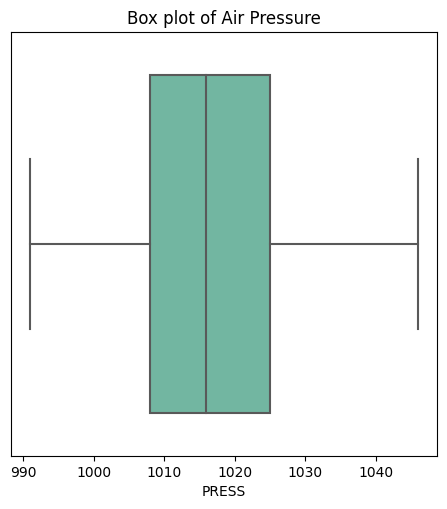

In [8]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES'], orient="h", palette="Set2")
g.set_title('Box plot of Air Pressure');
g.set(xlabel='PRESS')
g.set(yticklabels=[])
g.tick_params(left=False);

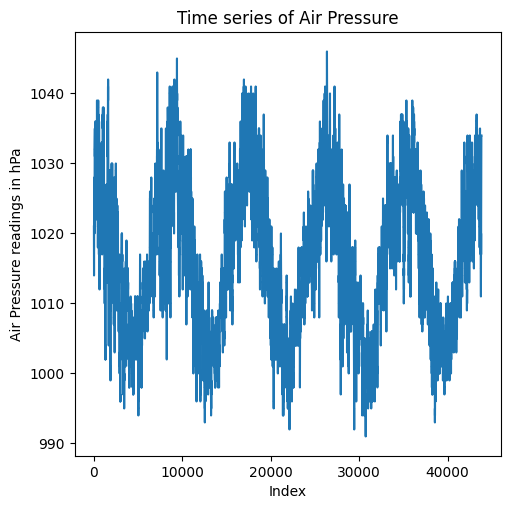

In [9]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(df['PRES'])
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa');

- `Los algoritmos de gradiente descendiente funcionan mejor (por ejemplo, convergen más rápido) si las variables están dentro del intervalo` $[-1, 1]$. Muchas fuentes relajan el límite hasta $[-3, 3]$. La variable `PRES` es escalada con `minmax` para limitar la variable transformada dentro de $[0,1]$.

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler.fit_transform(np.array(df['PRES']).reshape(-1, 1))

- Antes de entrenar el modelo, el conjunto de datos se divide en dos partes: el conjunto de `entrenamiento` y el conjunto de `validación`. La red neuronal se entrena en el conjunto de entrenamiento. Esto significa que `el cálculo de la función de pérdida, la propagación hacia atrás y los pesos actualizados mediante un algoritmo de gradiente descendiente se realizan en el conjunto de entrenamiento`.

- `El conjunto de validación se utiliza para evaluar el modelo y determinar el número de épocas en su entrenamiento`. Aumentar el número de épocas reducirá aún más la función de pérdida en el conjunto de entrenamiento, pero no necesariamente tendrá el mismo efecto en el conjunto de validación debido al sobreajuste en el conjunto de entrenamiento, por lo que `el número de épocas se controla manteniendo una evaluación y verificación sobre la función de pérdida calculada para el conjunto de validación`. 

- Utilizamos `Keras` con el backend `Tensorflow` para definir y entrenar el modelo. Todos los pasos implicados en el entrenamiento y validación del modelo se realizan llamando a las funciones apropiadas de la `API` de `Keras`.

- `Los cuatro primeros años, de 2010 a 2013, se utilizan como entrenamiento y
2014 se utiliza para la validación`

In [11]:
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (35064, 15)
Shape of test: (8760, 15)


In [12]:
df_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00,0.545455
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00,0.527273
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00,0.509091
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00,0.509091
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00,0.490909


In [13]:
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
35064,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.418182
35065,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.400000
35066,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.400000
35067,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.400000
35068,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.381818


- Restablecemos los `índices del conjunto de validación`

In [14]:
df_val.reset_index(drop=True, inplace=True)

In [15]:
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_PRES
0,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.418182
1,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.400000
2,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.400000
3,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.400000
4,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.381818


- También `se grafican las series temporales de entrenamiento y validación normalizadas para PRES`.

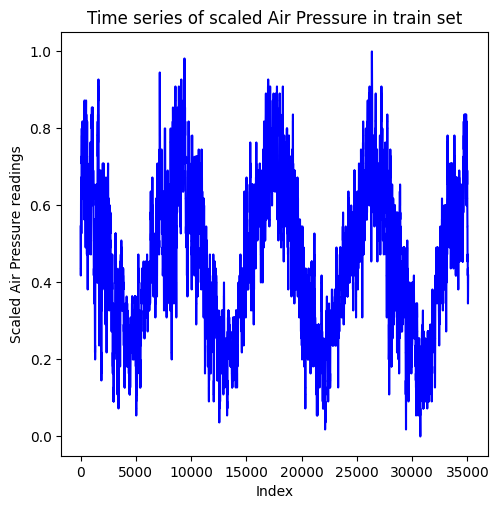

In [16]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(df_train['scaled_PRES'], color='b')
g.set_title('Time series of scaled Air Pressure in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings');

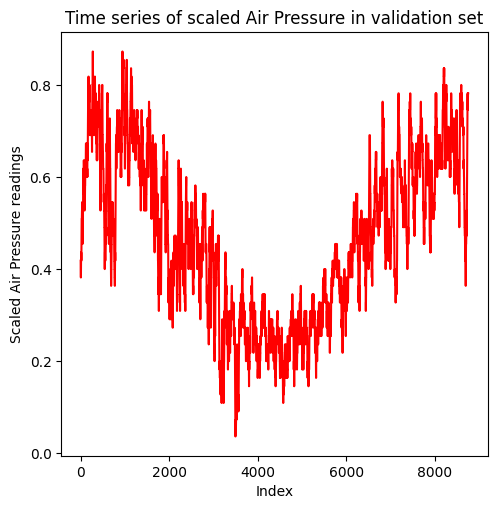

In [17]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(df_val['scaled_PRES'], color='r')
g.set_title('Time series of scaled Air Pressure in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled Air Pressure readings');

- Ahora necesitamos generar los `regresores` ($X$) y la `variable objetivo` ($y$) para el entrenamiento y la validación. `La matriz bidimensional de regresores y la matriz unidimensional de objetivo se crean a partir de la matriz unidimensional original de la columna standardized_PRES` en el *DataFrame*. Para el modelo de predicción de series temporales, `se utilizan las observaciones de los últimos siete días para predecir el día siguiente`. Esto equivale a un modelo $AR(7)$. Definimos una función que toma la serie temporal original y el número de pasos temporales en regresores como entrada para generar las matrices de $X$ e $y$

In [18]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [19]:
X_train, y_train = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (35057, 7) (35057,)


In [20]:
X_val, y_val = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8753, 7) (8753,)


- Ahora definimos el `MLP` utilizando la `API` funcional de `Keras`. En este enfoque `una capa puede ser declarada como la entrada de la siguiente capa en el momento de definir la siguiente`

In [21]:
input_layer = Input(shape=(7,), dtype='float32')

- Las capas densas las definimos en esta caso con `activación lineal`. Puede utilizar un `GridSearch` tal como se hizo en el curso de `Machine Learning` para encontrar hiperparámetros adecuados minimizando las métricas de regresión.

In [22]:
dense1 = Dense(32, activation='linear')(input_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(16, activation='linear')(dense2)

- Las `múltiples capas ocultas y el gran número de neuronas en cada capa oculta le dan a las redes neuronales la capacidad de modelar la compleja no linealidad de las relaciones subyacentes entre los regresores y el objetivo`. Sin embargo, las redes neuronales profundas también pueden sobreajustar los datos de entrenamiento y dar malos resultados en el conjunto de validación o prueba. El `Dropout` se ha utilizado eficazmente para regularizar las redes neuronales profundas. 

- En este ejemplo, se añade una capa `Dropout` antes de la capa de salida. `Dropout aleatoriamente establece` $p$ `fracción de neuronas de entrada a cero antes de pasar a la siguiente capa`. La eliminación aleatoria de entradas actúa esencialmente como un tipo de ensamblaje de modelos de agregación `bootstrap`. Por ejemplo, `el bosque aleatorio utiliza el ensamblaje mediante la construcción de árboles en subconjuntos aleatorios de características de entrada`. Utilizamos $p=0.2$ para descartar el 20% de las características de entrada seleccionadas aleatoriamente.

In [23]:
dropout_layer = Dropout(0.2)(dense3)

- Por último, la capa de salida predice la presión atmosférica del día siguiente

In [24]:
output_layer = Dense(1, activation='linear')(dropout_layer)

- Las capas de entrada, densa y de salida se empaquetarán ahora dentro de un modelo, que es una clase envolvente para entrenar y hacer predicciones. `Como función de pérdida se utiliza el error cuadrático medio` ($MSE$). Los pesos de la red se optimizan mediante el algoritmo `Adam`. `Adam` significa `estimación adaptativa de momentos` y ha sido una opción popular para el entrenamiento de redes neuronales profundas. 

- A diferencia del `gradiente descendiente estocástico, Adam utiliza diferentes tasas de aprendizaje para cada peso y las actualiza por separado a medida que avanza el entrenamiento`. La tasa de aprendizaje de un peso se actualiza basándose en medias móviles ponderadas exponencialmente de los gradientes del peso y los gradientes al cuadrado.

In [25]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_squared_error', optimizer='adam')
ts_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable par

- El modelo se entrena llamando a la función `fit()` en el objeto modelo y pasándole `X_train` y `y_train`. El entrenamiento se realiza para un número predefinido de épocas. Además, `batch_size` define el número de muestras del conjunto de entrenamiento que se utilizarán para una instancia de backpropagation. El conjunto de datos de validación también se pasa para evaluar el modelo después de cada `epoch` completa. Un objeto `ModelCheckpoint rastrea la función de pérdida en el conjunto de validación y guarda el modelo para la época en la que la función de pérdida ha sido mínima`.

```shell
save_weights_at = os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1);
```

```shell
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=2, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True);
```

```{figure} ./figures/epochs_mlp.png
:name: epochs_mlp
:align: center
```

- Se hacen predicciones para la presión atmosférica a partir del modelo mejor guardado. `Las predicciones del modelo, que son sobre la presión atmosférica escalada, se transforman inversamente para obtener predicciones sobre la presión atmosférica original`. También se calcula la bondad de ajuste o `R cuadrado`.

In [28]:
# best_model = load_model(os.path.join('keras_models', 'PRSA_data_Air_Pressure_MLP_weights.12-0.0001.hdf5'))
# preds = best_model.predict(X_val)
# pred_PRES = scaler.inverse_transform(preds)
# pred_PRES = np.squeeze(pred_PRES)

In [29]:
# r2 = r2_score(df_val['PRES'].loc[7:], pred_PRES)
# print('R-squared for the validation set:', round(r2,4))

In [30]:
# #Let's plot the first 50 actual and predicted values of air pressure.
# plt.figure(figsize=(5.5, 5.5))
# plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
# plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
# plt.legend(['Actual','Predicted'], loc=2)
# plt.title('Actual vs Predicted Air Pressure')
# plt.ylabel('Air Pressure')
# plt.xlabel('Index');

- También se ha entrenado un modelo de previsión de series temporales mediante `MLP` para la variable `pm2.5` y la implementación detallada se presenta a continuación

In [31]:
df = pd.read_csv('datasets/PRSA_data_2010.1.1-2014.12.31.csv')

In [32]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [33]:
#Let's see the first five rows of the DataFrame
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [34]:
"""
Rows having NaN values in column pm2.5 are dropped.
"""
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [35]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

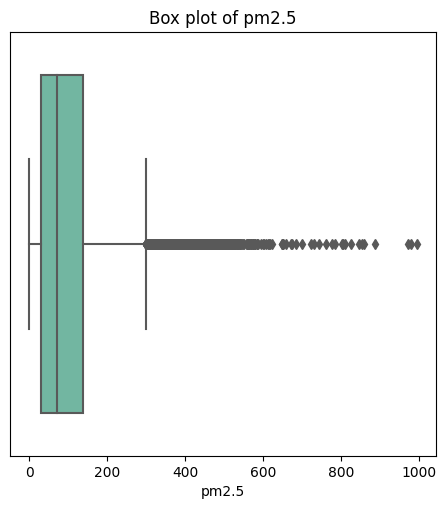

In [36]:
#Let us draw a box plot to visualize the central tendency and dispersion of pm2.5
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'], orient="h", palette="Set2")
g.set_title('Box plot of pm2.5');
g.set(xlabel='pm2.5')
g.set(yticklabels=[])
g.tick_params(left=False);

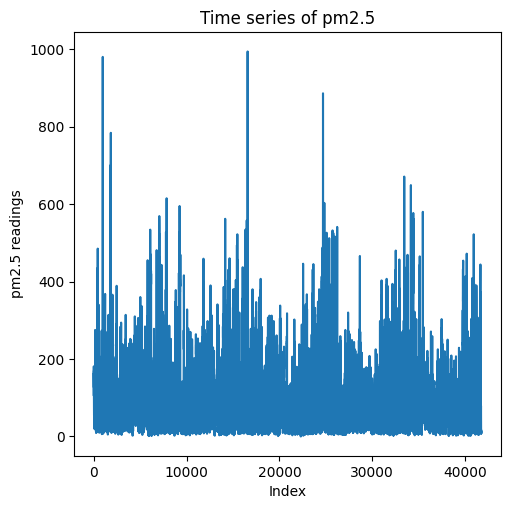

In [37]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings');

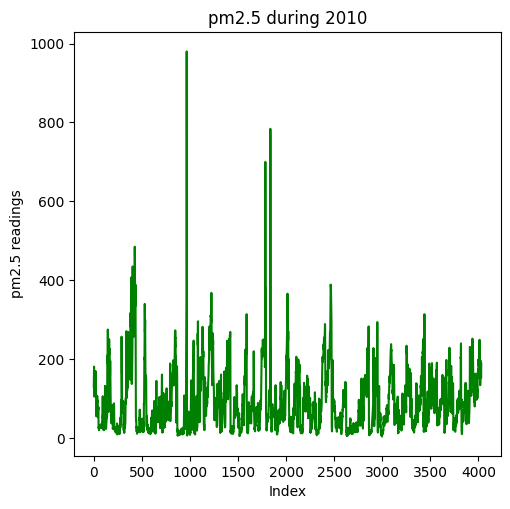

In [38]:
#Let's plot the series for six months to check if any pattern apparently exists.
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings');

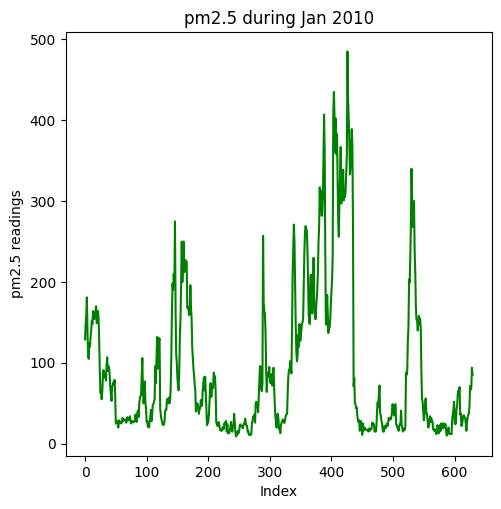

In [39]:
#Let's zoom in on one month.
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings');

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

In [41]:
"""
Let's start by splitting the dataset into train and validation. The dataset's time period if from
Jan 1st, 2010 to Dec 31st, 2014. The first fours years - 2010 to 2013 is used as train and
2014 is kept for validation.
"""
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [42]:
#First five rows of train
df_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [43]:
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [44]:
#Reset the indices of the validation set
df_val.reset_index(drop=True, inplace=True)

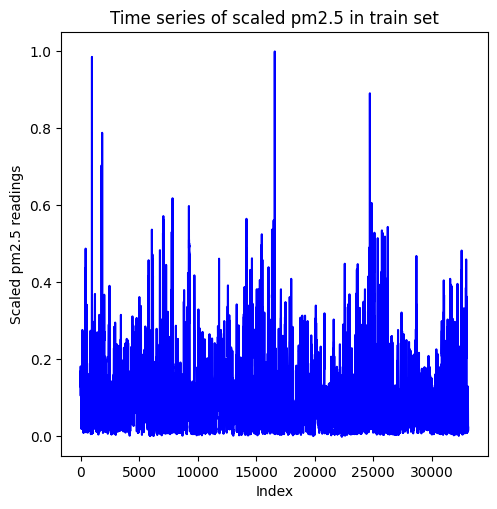

In [45]:
"""
The train and validation time series of scaled pm2.5 is also plotted.
"""

plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings');

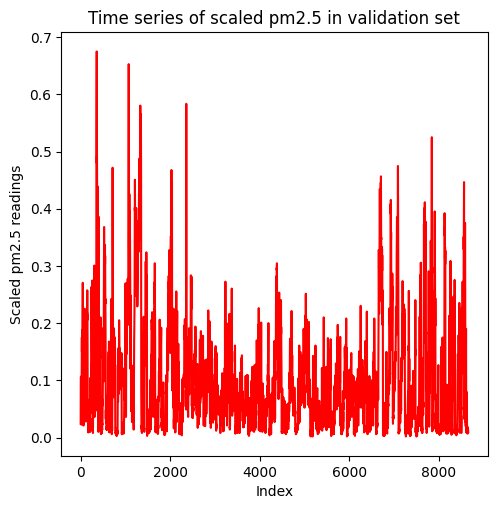

In [46]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings');

In [47]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [48]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


In [49]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,), dtype='float32')

In [50]:
#Dense layers are defined with linear activation
dense1 = Dense(32, activation='tanh')(input_layer)
dense2 = Dense(16, activation='tanh')(dense1)
dense3 = Dense(16, activation='tanh')(dense2)

In [51]:
dropout_layer = Dropout(0.2)(dense3)

In [52]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

In [53]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                256       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable p

```shell
save_weights_at = os.path.join('keras_models', 'PRSA_data_PM2.5_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True);
```

```{figure} ./figures/epochs_mlp2.png
:name: epochs_mlp2
:align: center
```

In [56]:
# best_model = load_model(os.path.join('keras_models', 'PRSA_data_PM2.5_MLP_weights.19-0.0118.hdf5'))
# preds = best_model.predict(X_val)
# pred_pm25 = scaler.inverse_transform(preds)
# pred_pm25 = np.squeeze(pred_pm25)

In [57]:
# mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
# print('MAE for the validation set:', round(mae, 4))

- Trazamos los 50 primeros valores reales y previstos de `pm2.5`

In [59]:
# plt.figure(figsize=(5.5, 5.5))
# plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
# plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
# plt.legend(['Actual','Predicted'], loc=2)
# plt.title('Actual vs Predicted pm2.5')
# plt.ylabel('pm2.5')
# plt.xlabel('Index');